<a href="https://colab.research.google.com/github/adriano-op/redeNeural/blob/main/CNN_%2B_EEG_EVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funções

In [1]:
# ##### Funçao auxiliar utilizada para transpor os dados de um arquivo e sobrescrever o nome

# import os
# import pandas as pd

# def processar_arquivo(arquivo_entrada, arquivo_saida):
#     """
#      Recebe o arquivo na dimensão(N,1), efetua a sua transposta (1,N)
#      e gera um novo aquivo  com o mesmo nome.
#     """

#     # Ler o arquivo CSV
#     dados = pd.read_csv(arquivo_entrada)

#     # Transpor os dados
#     dados_transpostos = dados.transpose()

#     # Salvar os dados transpostos em um novo arquivo
#     dados_transpostos.to_csv(arquivo_saida, index=False, header=False)

# def processar_diretorio(diretorio):
#     for arquivo_entrada, _, arquivos in os.walk(diretorio):
#         for arquivo in arquivos:
#             if arquivo.endswith('.csv'):
#                   caminho_arquivo = os.path.join(arquivo_entrada, arquivo)
#                   nome_arquivo_saida = os.path.splitext(caminho_arquivo)[0] + '.csv'
#                   processar_arquivo(caminho_arquivo, nome_arquivo_saida)
#                   print(nome_arquivo_saida)

# # # # Exemplo de uso dataSet_EVM
# processar_diretorio('/content/drive/MyDrive/mestrado/IniciacaoCientifica-carlos/RedeNeural/Dataset_CSV/')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
"""
  Acessa o diretorio onde se encontram os demais classes e
  arquivos para executar esse algoritmo
"""

%cd "/content/drive/MyDrive/mestrado/IniciacaoCientifica-carlos/RedeNeural"
!pwd

/content/drive/MyDrive/mestrado/IniciacaoCientifica-carlos/RedeNeural
/content/drive/MyDrive/mestrado/IniciacaoCientifica-carlos/RedeNeural


# Main Deep Learning

aqui,Using Data Generators
DATA GENERATOR: Loading data from task 1.
DATA GENERATOR: 1.csv was loaded.
DATA GENERATOR: 2.csv was loaded.
DATA GENERATOR: 3.csv was loaded.
DATA GENERATOR: 4.csv was loaded.
DATA GENERATOR: 5.csv was loaded.
DATA GENERATOR: 6.csv was loaded.
DATA GENERATOR: 7.csv was loaded.
DATA GENERATOR: 8.csv was loaded.
DATA GENERATOR: 9.csv was loaded.
DATA GENERATOR: 10.csv was loaded.
DATA GENERATOR: 11.csv was loaded.
DATA GENERATOR: 12.csv was loaded.
DATA GENERATOR: 13.csv was loaded.
DATA GENERATOR: 14.csv was loaded.
DATA GENERATOR: 15.csv was loaded.
DATA GENERATOR: 16.csv was loaded.
DATA GENERATOR: 17.csv was loaded.
DATA GENERATOR: 18.csv was loaded.
DATA GENERATOR: 19.csv was loaded.
DATA GENERATOR: 20.csv was loaded.
DATA GENERATOR: 21.csv was loaded.
DATA GENERATOR: 22.csv was loaded.
DATA GENERATOR: 23.csv was loaded.
DATA GENERATOR: 24.csv was loaded.
DATA GENERATOR: 25.csv was loaded.
DATA GENERATOR: 26.csv was loaded.
DATA GENERATOR: 27.csv was loa

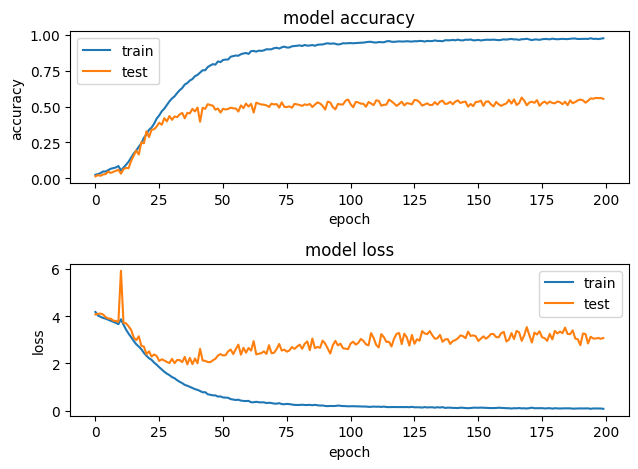

Maximum Loss : 4.1706
Minimum Loss : 0.0755
Loss difference : 4.0952

model was saved to model_weights.h5.


Evaluating on training set...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


loss=0.0002, accuracy: 100.0000%

Evaluating on validation set...
loss=3.0566, accuracy: 55.4286%

Evaluating on testing set...
loss=0.4007, accuracy: 95.1754%

Evaluating on testing set time in miliseconds: 411.4658832550049
Evaluating on testing set time in seconds: 0.4114658832550049
Evaluating on testing set time in minutes: 0.006857764720916748

Model: "Regularized_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv1D)              (None, 300, 256)          1536      
                                                                 
 Norm1 (BatchNormalization)  (None, 300, 256)          1024      
                                                                 
 Pool1 (MaxPooling1D)        (None, 150, 256)          0         
                                                                 
 Conv2 (Conv1D)              (None, 150, 128)          163968    
                            

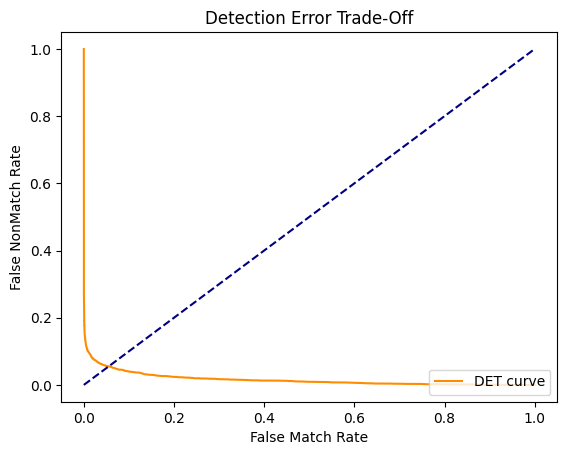

EER: 5.5162324139082495 %
Decidability: 3.858705525311534


In [4]:
import models
import data_manipulation
import preprocessing
import utils
import loader

import argparse
import sys
import os
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD
from numpy import savetxt, loadtxt
from tensorflow.keras.optimizers import Adam ##
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint ##

# Seeds
random.seed(1051)
np.random.seed(1051)
tf.random.set_seed(1051)

# Hyperparameters
batch_size = 100                # Batch Size
training_epochs = 200           # Total number of training epochs
initial_learning_rate =  0.001   #0.01    # Initial learning rate

# Parameters used in functions.load_data()

folder_path = '/content/drive/MyDrive/mestrado/IniciacaoCientifica-carlos/RedeNeural/Dataset_CSV_V_2/'
processed_data_path = '/content/drive/MyDrive/mestrado/IniciacaoCientifica-carlos/RedeNeural/'

num_classes = 56               # Total number of classes (individuals)

# Parameters used in functions.filter_data()
band_pass_4 = [0.01, 29]        # Four filter option,  00~30Hz
sample_frequency = 60          # Frequency of the sampling
filter_order = 12               # Order of the filter
filter_type = 'filtfilt'        # Type of the filter used: 'sosfilt' or 'filtfilt'

# Parameters used in functions.normalize_data()
normalize_type = 'each_channel' # Type of the normalization that will be applied: 'each_channel' or 'all_channels'

# Parameters used in functions.crop_data()
window_size = 300         # Sliding window size, used when composing the dataset
offset      = 30          # Sliding window offset (deslocation), used when composing the dataset
split_ratio = 0.9         # 90% for training | 10% for validation

# Other Parameters
num_channels = 1          # Number of channels in an EEG signal

# VARIAVEIS
train_tasks = [1,2]
test_tasks = [2]
_nofit = False
_datagen = True
_noimode = False      #usado para o modo de identificaçao
_novmode = False      #usado para o modo de verificação

for task in train_tasks:
    if(task <= 0 or task >= 15):
        print('ERROR: All training/validation and testing tasks need to be higher than 0 and lower than 15.\n')
        sys.exit()

for task in test_tasks:
    if(task <= 0 or task >= 15):
        print('ERROR: All training/validation and testing tasks need to be higher than 0 and lower than 15.\n')
        sys.exit()

# Defining the optimizer and the learning rate scheduler
opt = SGD(learning_rate = initial_learning_rate, momentum = 0.9)
lr_scheduler = LearningRateScheduler(models.scheduler, verbose = 0)
saver = models.SaveAtEpochEnd(5, 'model_weights')
model = None


# Not using Data Generators
if(not _datagen):
    # Loading the raw data
    train_content, test_content = loader.load_data(folder_path, train_tasks, test_tasks, 'csv', num_classes, 1)

    # Filtering the raw data
    train_content = preprocessing.filter_data(train_content, band_pass_4, sample_frequency, filter_order, filter_type, 1)
    test_content = preprocessing.filter_data(test_content, band_pass_4, sample_frequency, filter_order, filter_type, 1)

    # Normalize the filtered data
    train_content = preprocessing.normalize_data(train_content, 'sun', 1)
    test_content = preprocessing.normalize_data(test_content, 'sun', 1)

    # Getting the training, validation and testing data
    x_train, y_train, x_val, y_val = data_manipulation.crop_data(train_content, train_tasks, num_classes,
                                                        window_size, offset, split_ratio)
    x_test, y_test = data_manipulation.crop_data(test_content, test_tasks, num_classes, window_size,
                                        window_size)
    print('x_train.shape, y_train.shape, x_val.shape, y_val.shape',x_train.shape, y_train.shape, x_val.shape, y_val.shape)
    # Training the model
    if(not _nofit):

        # Creating the model
        model = models.create_cnn_based_on(window_size, num_channels, num_classes)
        model.summary()

        # Compiling, defining the LearningRateScheduler and training the model
        model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])

        fit_begin = time.time()

        results = model.fit(x_train,
                            y_train,
                            batch_size = batch_size,
                            epochs = training_epochs,
                            callbacks = [lr_scheduler],
                            validation_data = (x_val, y_val)
                            )

        fit_end = time.time()
        print(f'Training time in seconds: {fit_end - fit_begin}')
        print(f'Training time in minutes: {(fit_end - fit_begin)/60.0}')
        print(f'Training time in hours: {(fit_end - fit_begin)/3600.0}\n')

        # Summarize history for accuracy
        plt.subplot(211)
        plt.plot(results.history['accuracy'])
        plt.plot(results.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'])

        # Summarize history for loss
        plt.subplot(212)
        plt.plot(results.history['loss'])
        plt.plot(results.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'])
        plt.tight_layout()
        plt.savefig(r'accuracy-loss.png', format='png')
        plt.show()

        max_loss = np.max(results.history['loss'])
        min_loss = np.min(results.history['loss'])
        print("Maximum Loss : {:.4f}".format(max_loss))
        print("Minimum Loss : {:.4f}".format(min_loss))
        print("Loss difference : {:.4f}\n".format((max_loss - min_loss)))

        # Saving model weights
        model.save('model_weights.h5')
        print('model was saved to model_weights.h5.\n')

    # Running the model in Identification Mode
    if(not _noimode):

        # Evaluate the model to see the accuracy
        if(model is None):
            model = models.create_cnn_based_on(window_size, num_channels, num_classes)
            model.summary()
            model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])
            # model.load_weights('model_weights.h5', by_name=True)

        print('\nEvaluating on training set...')
        (loss, accuracy) = model.evaluate(x_train, y_train, verbose = 0)
        print('loss={:.4f}, accuracy: {:.4f}%\n'.format(loss,accuracy * 100))

        print('Evaluating on validation set...')
        (loss, accuracy) = model.evaluate(x_val, y_val, verbose = 0)
        print('loss={:.4f}, accuracy: {:.4f}%\n'.format(loss,accuracy * 100))

        print('Evaluating on testing set...')
        test_begin = time.time()

        (loss, accuracy) = model.evaluate(x_test, y_test, verbose = 0)
        print('loss={:.4f}, accuracy: {:.4f}%\n'.format(loss,accuracy * 100))

        test_end = time.time()
        print(f'Evaluating on testing set time in miliseconds: {(test_end - test_begin) * 1000.0}')
        print(f'Evaluating on testing set time in seconds: {test_end - test_begin}')
        print(f'Evaluating on testing set time in minutes: {(test_end - test_begin)/60.0}\n')

    # Running the model in Verification Mode
    if(not _novmode):

        # Removing the last layers of the model and getting the features array
        model_for_verification = models.create_cnn_based_on(window_size, num_channels, num_classes, True)
        model_for_verification.summary()
        model_for_verification.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])
        model_for_verification.load_weights('model_weights.h5', by_name=True)

        x_pred = model_for_verification.predict(x_test, batch_size = batch_size)

        # Calculating EER and Decidability
        y_test_classes = utils.one_hot_encoding_to_classes(y_test)
        d, eer, thresholds = utils.calc_metrics(x_pred, y_test_classes, x_pred, y_test_classes)
        print(f'EER: {eer*100.0} %')
        print(f'Decidability: {d}')

# Using Data Generators
else:
    print('aqui,Using Data Generators')
    # Loading the raw data
    train_content, test_content = loader.load_data(folder_path, train_tasks, test_tasks, 'csv', num_classes)


    # Filtering the raw data
    test_content = preprocessing.filter_data(test_content, band_pass_4, sample_frequency, filter_order, filter_type)

    # Normalize the filtered data
    test_content = preprocessing.normalize_data(test_content, 'sun')

    # Getting the testing data
    x_test, y_test = data_manipulation.crop_data(test_content, test_tasks, num_classes, window_size, window_size)

    # Processing train/validation data
    for task in train_tasks:

        if(not os.path.exists(processed_data_path + 'processed_data/task'+str(task))):
            folder = Path(processed_data_path + 'processed_data/task'+str(task))
            folder.mkdir(parents=True)

            # Loading the raw data
            train_content, test_content = loader.load_data(folder_path, [task], [], 'csv', num_classes)

            # Filtering the raw data
            train_content = preprocessing.filter_data(train_content, band_pass_4, sample_frequency, filter_order, filter_type)

            # Normalize the filtered data
            train_content = preprocessing.normalize_data(train_content, 'sun')

            list = []
            for index in range(0, len(train_content)):
                data = train_content[index]
                string = 'x_subject_' + str(index+1)
                savetxt(processed_data_path + 'processed_data/task' + str(task) + '/' + string + '.csv', data, fmt='%f', delimiter=';')
                print(processed_data_path + 'processed_data/task' + str(task) + '/' + string + '.csv was saved.')
                list.append(string+'.csv')

            savetxt(processed_data_path + 'processed_data/task' + str(task) + '/' + 'x_list.csv', [list], delimiter=',', fmt='%s')
            print(f'file names were saved to processed_data/task{task}/x_list.csv')

    # Getting the file names that contains the preprocessed data
    x_train_list = []

    for task in train_tasks:
        x_train_list.append(loadtxt(processed_data_path + 'processed_data/task'+str(task)+'/x_list.csv', delimiter=',', dtype='str'))

    x_train_list = [item for sublist in x_train_list for item in sublist]

    # Defining the data generators
    training_generator = data_manipulation.DataGenerator(x_train_list, batch_size, window_size, offset,
        num_channels, num_classes, train_tasks, 'train', split_ratio, processed_data_path, True)
    validation_generator = data_manipulation.DataGenerator(x_train_list, batch_size, window_size, offset,
        num_channels, num_classes, train_tasks, 'validation', split_ratio, processed_data_path, True)

    # Training the model
    if(not _nofit):
        # Creating the model
        model = models.create_cnn_based_on(window_size, num_channels, num_classes) ##
        model.summary()


        # Compiling, defining the LearningRateScheduler and training the model
        model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])

        fit_begin = time.time()


        results = model.fit(training_generator,
                            validation_data = validation_generator,
                            epochs = training_epochs,
                            callbacks = [lr_scheduler]
                            # callbacks = [lr_scheduler, saver]
                            #callbacks = [reduce_lr, model_checkpoint] ##
                            )

        fit_end = time.time()
        print(f'Training time in seconds: {fit_end - fit_begin}')
        print(f'Training time in minutes: {(fit_end - fit_begin)/60.0}')
        print(f'Training time in hours: {(fit_end - fit_begin)/3600.0}\n')

        # Summarize history for accuracy
        plt.subplot(211)
        plt.plot(results.history['accuracy'])
        plt.plot(results.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'])

        # Summarize history for loss
        plt.subplot(212)
        plt.plot(results.history['loss'])
        plt.plot(results.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'])
        plt.tight_layout()
        plt.savefig(r'accuracy-loss.png', format='png')
        plt.show()

        max_loss = np.max(results.history['loss'])
        min_loss = np.min(results.history['loss'])
        print("Maximum Loss : {:.4f}".format(max_loss))
        print("Minimum Loss : {:.4f}".format(min_loss))
        print("Loss difference : {:.4f}\n".format((max_loss - min_loss)))

        # Saving model weights
        model.save('model_weights.h5')
        print('model was saved to model_weights.h5.\n')

    # Running the model in Identification Mode
    if(not _noimode):

        # Evaluate the model to see the accuracy
        if(model is None):
            model = models.create_cnn_based_on(window_size, num_channels, num_classes) ##
            model.summary()
            model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])
            model.load_weights('model_weights.h5', by_name=True)

        print('\nEvaluating on training set...')
        (loss, accuracy) = model.evaluate(training_generator, verbose = 0)
        print('loss={:.4f}, accuracy: {:.4f}%\n'.format(loss,accuracy * 100))

        print('Evaluating on validation set...')
        (loss, accuracy) = model.evaluate(validation_generator, verbose = 0)
        print('loss={:.4f}, accuracy: {:.4f}%\n'.format(loss,accuracy * 100))

        print('Evaluating on testing set...')
        test_begin = time.time()

        (loss, accuracy) = model.evaluate(x_test, y_test, verbose = 0)
        print('loss={:.4f}, accuracy: {:.4f}%\n'.format(loss,accuracy * 100))

        test_end = time.time()
        print(f'Evaluating on testing set time in miliseconds: {(test_end - test_begin) * 1000.0}')
        print(f'Evaluating on testing set time in seconds: {test_end - test_begin}')
        print(f'Evaluating on testing set time in minutes: {(test_end - test_begin)/60.0}\n')

    # Running the model in Verification Mode
    if(not _novmode):

        # Removing the last layers of the model and getting the features array
        model_for_verification = models.create_cnn_based_on(window_size, num_channels, num_classes, True) ##
        model_for_verification.summary()
        model_for_verification.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])
        model_for_verification.load_weights('model_weights.h5', by_name=True)

        x_pred = model_for_verification.predict(x_test, batch_size = batch_size)

        # Calculating EER and Decidability
        y_test_classes = utils.one_hot_encoding_to_classes(y_test)
        d, eer, thresholds = utils.calc_metrics(x_pred, y_test_classes, x_pred, y_test_classes)
        print(f'EER: {eer * 100.0} %')
        print(f'Decidability: {d}')


# Main Traditional Machine Learning

In [5]:
# import models
# import data_manipulation
# import preprocessing
# import utils
# import loader

# import argparse
# import sys
# import os
# import time
# import random
# import numpy as np
# import matplotlib.pyplot as plt
# from pathlib import Path
# from numpy import savetxt, loadtxt

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# ml_models = {'svm': SVC,
#              'rf': RandomForestClassifier}

# # Seeds
# random.seed(1051)
# np.random.seed(1051)

# # Hyperparameters
# batch_size = 100                # Batch Size
# training_epochs = 100           # Total number of training epochs
# initial_learning_rate =  0.01   # 0.01    # Initial learning rate

# num_classes = 33 #109               # Total number of classes (individuals)
# # Other Parameters
# num_channels = 1 # 64            # Number of channels in an EEG signal

# # Parameters used in functions.load_data()
# folder_path = '/content/drive/MyDrive/mestrado/IniciacaoCientifica-carlos/RedeNeural/Dataset_CSV/'
# processed_data_path = '/content/drive/MyDrive/mestrado/IniciacaoCientifica-carlos/RedeNeural/'

# # Parameters used in functions.filter_data()
# band_pass_1 = [1, 50]           # First filter option, 01~50Hz
# band_pass_2 = [10, 30]          # Second filter option,10~30Hz
# band_pass_3 = [30, 50]          # Third filter option, 30~50Hz
# band_pass_4 = [0.01, 29]        # Four filter option,  00~30Hz
# sample_frequency = 60 #160      # Frequency of the sampling
# filter_order = 12               # Order of the filter
# filter_type = 'filtfilt'        # Type of the filter used: 'sosfilt' or 'filtfilt'

# # Parameters used in functions.normalize_data()
# normalize_type = 'each_channel' # Type of the normalization that will be applied: 'each_channel' or 'all_channels'

# # Parameters used in functions.crop_data()
# window_size = 300 #1920         # Sliding window size, used when composing the dataset
# offset      = 30  #35           # Sliding window offset (deslocation), used when composing the dataset
# split_ratio = 0.9               # 90% for training | 20% for validation


# # VARIAVEIS
# train_tasks = [1]
# test_tasks = [2]
# model_name = 'svm'
# _nofit = False
# _datagen = False  # True
# _noimode = False  # -> model in Identification Mode

# # 9 channels present in Yang et al. article
# frontal_lobe_yang = ['Af3.', 'Afz.', 'Af4.']
# motor_cortex_yang = ['C1..', 'Cz..', 'C2..']
# occipital_lobe_yang = ['O1..', 'Oz..', 'O2..']
# all_channels_yang = ['C1..', 'Cz..', 'C2..', 'Af3.', 'Afz.', 'Af4.', 'O1..', 'Oz..', 'O2..']

# for task in train_tasks:
#     if(task <= 0 or task >= 15):
#         print('ERROR: All training/validation and testing tasks need to be higher than 0 and lower than 15.\n')
#         sys.exit()

# for task in test_tasks:
#     if(task <= 0 or task >= 15):
#         print('ERROR: All training/validation and testing tasks need to be higher than 0 and lower than 15.\n')
#         sys.exit()

# model = None
# print('train_tasks', len(train_tasks))

# # Loading the raw data
# train_content, test_content = loader.load_data(folder_path, train_tasks, test_tasks, 'csv', num_classes, 1)

# # Filtering the raw data
# train_content = preprocessing.filter_data(train_content, band_pass_4, sample_frequency, filter_order, filter_type, 1)
# test_content = preprocessing.filter_data(test_content, band_pass_4, sample_frequency, filter_order, filter_type, 1)

# # Normalize the filtered data
# train_content = preprocessing.normalize_data(train_content, 'sun', 1)
# test_content = preprocessing.normalize_data(test_content, 'sun', 1)

# # Getting the training, validation and testing data
# x_train, y_train, x_val, y_val = data_manipulation.crop_data(train_content, train_tasks, num_classes,
#                                                     window_size, offset, split_ratio)

# print('x_train.shape, y_train.shape, x_val.shape, y_val.shape',x_train.shape, y_train.shape, x_val.shape, y_val.shape)

# x_test, y_test = data_manipulation.crop_data(test_content, test_tasks, num_classes, window_size,
#                                     window_size)

# x_train = x_train.reshape((-1, window_size))
# y_train = np.argmax(y_train, axis=1)
# x_val = x_val.reshape((-1, window_size))
# y_val = np.argmax(y_val, axis=1)
# x_test = x_test.reshape((-1, window_size))
# y_test = np.argmax(y_test, axis=1)

# print('x_test.shape, y_test.shape',x_test.shape, y_test.shape)

# # Training the model
# if(not _nofit):
#     print('not _nofit xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx', not _nofit)
#     # Creating the model
#     model = ml_models[model_name]()

#     fit_begin = time.time()

#     results = model.fit(x_train, y_train)

#     fit_end = time.time()
#     print(f'Training time in seconds: {fit_end - fit_begin}')
#     print(f'Training time in minutes: {(fit_end - fit_begin)/60.0}')
#     print(f'Training time in hours: {(fit_end - fit_begin)/3600.0}\n')

#     # Saving model weights
#     # model.save('model_weights.h5')
#     # print('model was saved to model_weights.h5.\n')
#     print('NEED TO SAVE MODEL')

# # Running the model in Identification Mode
# if(not _noimode):
#     print('not _noimode xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx', not _noimode)
#     # Evaluate the model to see the accuracy
#     if(model is None):
#         print('NEET TO TRAIN MODEL................')
#         exit(1)

#     print('\nEvaluating on training set...')
#     accuracy = accuracy_score(y_train, model.predict(x_train))
#     print('accuracy: {:.4f}%\n'.format(accuracy * 100))

#     print('Evaluating on validation set...')
#     accuracy = accuracy_score(y_val, model.predict(x_val))
#     print('accuracy: {:.4f}%\n'.format(accuracy * 100))

#     print('Evaluating on testing set...')
#     test_begin = time.time()
#     accuracy = accuracy_score(y_test, model.predict(x_test))
#     print('accuracy: {:.4f}%\n'.format(accuracy * 100))

#     test_end = time.time()
#     print(f'Evaluating on testing set time in miliseconds: {(test_end - test_begin) * 1000.0}')
#     print(f'Evaluating on testing set time in seconds: {test_end - test_begin}')
#     print(f'Evaluating on testing set time in minutes: {(test_end - test_begin)/60.0}\n')


Testando o modelo como função:

In [6]:
!pip install joblib

In [7]:
from joblib import dump

def save_sklearn_model(model, file_path):
    """
    Salva um modelo do scikit-learn em um arquivo.

    Parâmetros:
    - model: O modelo do scikit-learn a ser salvo.
    - file_path: O caminho do arquivo onde o modelo será salvo.
    """
    try:
        dump(model, file_path)
        print(f"Modelo salvo com sucesso em: {file_path}")
    except Exception as e:
        print(f"Erro ao salvar o modelo: {str(e)}")

# Exemplo de uso:
# Suponha que 'model' seja seu modelo do scikit-learn e você deseja salvá-lo em 'modelo_salvo.joblib'
# save_sklearn_model(model, 'modelo_salvo.joblib')


In [8]:
import models
import data_manipulation
import preprocessing
import utils
import loader
from sklearn import svm
import argparse
import sys
import os
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from numpy import savetxt, loadtxt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


def train_and_evaluate_model(train_tasks, test_tasks, model_name='svm', _nofit=False, _noimode=False):
    ml_models = {
        'svm': SVC,
        'rf': RandomForestClassifier,
        'LogisticRegression':LogisticRegression,
        'KNeighborsClassifier':KNeighborsClassifier
        }

    # Seeds
    random.seed(1051)
    np.random.seed(1051)

    # Hyperparameters
    batch_size = 100
    training_epochs = 200
    initial_learning_rate = 0.001
    num_classes = 56
    num_channels = 1

    folder_path = '/content/drive/MyDrive/mestrado/IniciacaoCientifica-carlos/RedeNeural/Dataset_CSV_V_2/'
    processed_data_path = '/content/drive/MyDrive/mestrado/IniciacaoCientifica-carlos/RedeNeural/'

    # Parameters used in functions.filter_data()
    band_pass_4 = [0.01, 29]
    sample_frequency = 60
    filter_order = 12
    filter_type = 'filtfilt'

    # Parameters used in functions.normalize_data()
    normalize_type = 'each_channel'

    # Parameters used in functions.crop_data()
    window_size = 300
    offset = 30
    split_ratio = 0.9

    train_content, test_content = loader.load_data(folder_path, train_tasks, test_tasks, 'csv', num_classes, 1)

    train_content = preprocessing.filter_data(train_content, band_pass_4, sample_frequency, filter_order, filter_type, 1)
    test_content = preprocessing.filter_data(test_content, band_pass_4, sample_frequency, filter_order, filter_type, 1)

    train_content = preprocessing.normalize_data(train_content, 'sun', 1)
    test_content = preprocessing.normalize_data(test_content, 'sun', 1)

    x_train, y_train, x_val, y_val = data_manipulation.crop_data(train_content, train_tasks, num_classes,
                                                                  window_size, offset, split_ratio)

    x_test, y_test = data_manipulation.crop_data(test_content, test_tasks, num_classes, window_size,
                                                 window_size)

    x_train = x_train.reshape((-1, window_size))
    y_train = np.argmax(y_train, axis=1)
    x_val = x_val.reshape((-1, window_size))
    y_val = np.argmax(y_val, axis=1)
    x_test = x_test.reshape((-1, window_size))
    y_test = np.argmax(y_test, axis=1)

    print('\n x_train,y_train,x_val,y_val,x_test,y_test:',x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape)

    model = None
    if model_name == 'svm':
        model = svm.SVC(kernel='linear')

    if model_name == 'KNeighborsClassifier' :
        model = KNeighborsClassifier(n_neighbors=5)
    else :
        model = ml_models[model_name]()


# if not _nofit:
    # model = ml_models[model_name]()
    fit_begin = time.time()
    results = model.fit(x_train, y_train)
    fit_end = time.time()
    print(f'Training time in seconds: {fit_end - fit_begin}')
    print(f'Training time in minutes: {(fit_end - fit_begin) / 60.0}')
    print(f'Training time in hours: {(fit_end - fit_begin) / 3600.0}\n')

# if not _noimode:

    print('model_name:',model_name)
    save_sklearn_model(model, 'modelo_salvo.joblib')
    # print('NEED TO TRAIN MODEL................')
    # exit(1)

    print('\nEvaluating on training set...')
    accuracy = accuracy_score(y_train, model.predict(x_train))
    print('accuracy: {:.4f}%\n'.format(accuracy * 100))

    print('Evaluating on validation set...')
    accuracy = accuracy_score(y_val, model.predict(x_val))
    print('accuracy: {:.4f}%\n'.format(accuracy * 100))

    print('Evaluating on testing set...')
    test_begin = time.time()
    accuracy = accuracy_score(y_test, model.predict(x_test))
    print('accuracy: {:.4f}%\n'.format(accuracy * 100))

    test_end = time.time()
    print(f'Evaluating on testing set time in milliseconds: {(test_end - test_begin) * 1000.0}')
    print(f'Evaluating on testing set time in seconds: {test_end - test_begin}')
    print(f'Evaluating on testing set time in minutes: {(test_end - test_begin) / 60.0}\n')

# Exemplo de uso da função
train_and_evaluate_model(train_tasks=[1,2], test_tasks=[2], model_name='KNeighborsClassifier', _nofit=False, _noimode=False)


Data is being filtered: 0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...100%
Data is being filtered: 0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...100%
Data is being normalized: 0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...100%
Data is being normalized: 0%...10%...20%...30%...40%...50%...60%...70%...80%...90%...100%

 x_train,y_train,x_val,y_val,x_test,y_test: (11618, 300) (11618,) (1415, 300) (1415,) (684, 300) (684,)
Training time in seconds: 0.002704143524169922
Training time in minutes: 4.5069058736165364e-05
Training time in hours: 7.511509789360894e-07

model_name: KNeighborsClassifier
Modelo salvo com sucesso em: modelo_salvo.joblib

Evaluating on training set...
accuracy: 23.8767%

Evaluating on validation set...
accuracy: 4.0989%

Evaluating on testing set...
accuracy: 20.7602%

Evaluating on testing set time in milliseconds: 659.815788269043
Evaluating on testing set time in seconds: 0.659815788269043
Evaluating on testing set time in min

Tripled Loss

In [9]:
# pip install bayesian-optimization

In [10]:
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras import backend as K
# from numpy import loadtxt
# from functools import partial
# from bayes_opt import BayesianOptimization

# import models
# import data_manipulation
# import preprocessing
# import utils
# import loader

# # Defina o caminho do diretório
# folder_path = '/content/drive/MyDrive/mestrado/IniciacaoCientifica-carlos/RedeNeural/Dataset_CSV_V_2/'

# # Defina o caminho onde os dados processados serão salvos
# processed_data_path = '/content/drive/MyDrive/mestrado/IniciacaoCientifica-carlos/RedeNeural/'

# # Defina as tarefas de treinamento e teste
# train_tasks = [1]
# test_tasks = [2]

# # Defina os parâmetros
# window_size = 300
# offset = 30
# split_ratio = 0.9
# num_classes = 56
# num_channels = 1
# batch_size = 100
# num_filters = 1
# band_pass_4 = [0.01, 29]
# sample_frequency = 60
# filter_order = 12
# filter_type = 'filtfilt'
# kernel_size = 5
# initial_learning_rate = 0.01
# normalize_type = 'each_channel'
# opt = SGD(learning_rate = initial_learning_rate, momentum = 0.9)
# lr_scheduler = LearningRateScheduler(models.scheduler, verbose = 0)

# # Carregue os dados de treinamento e teste
# train_content, test_content = loader.load_data(folder_path, train_tasks, test_tasks, 'csv', num_classes, 1)

# # Filtragem dos dados brutos
# train_content = preprocessing.filter_data(train_content, band_pass_4, sample_frequency, filter_order, filter_type, 1)
# test_content = preprocessing.filter_data(test_content, band_pass_4, sample_frequency, filter_order, filter_type, 1)

# # Normalize os dados filtrados
# train_content = preprocessing.normalize_data(train_content, 'sun', 1)
# test_content = preprocessing.normalize_data(test_content, 'sun', 1)

# # Obtenha os dados de treinamento, validação e teste
# x_train, y_train, x_val, y_val = data_manipulation.crop_data(train_content, train_tasks, num_classes, window_size, offset, split_ratio)

# print('x_train.shape, y_train.shape, x_val.shape, y_val.shape', x_train.shape, y_train.shape, x_val.shape, y_val.shape)
# print('\n')
# x_test, y_test = data_manipulation.crop_data(test_content, test_tasks, num_classes, window_size, window_size)

# # x_train_list = [loadtxt(processed_data_path + f'processed_data/task{task}/x_list.csv', delimiter=',', dtype='str') for task in train_tasks]
# # x_train_list = [item for sublist in x_train_list for item in sublist]

# # # Definindo os geradores de dados
# # training_generator = data_manipulation.DataGenerator(x_train_list, batch_size, window_size, offset,
# #     num_channels, num_classes, train_tasks, 'train', split_ratio, processed_data_path, True)
# # validation_generator = data_manipulation.DataGenerator(x_train_list, batch_size, window_size, offset,
# #     num_channels, num_classes, train_tasks, 'validation', split_ratio, processed_data_path, True)

# # Defina a função de perda triplet_loss
# def triplet_loss(y_true, y_pred, alpha=0.3):
#     anchor, positive, negative = y_pred[:, 0:128], y_pred[:, 128:256], y_pred[:, 256:]
#     positive_dist = K.sum(K.square(anchor - positive), axis=-1)
#     negative_dist = K.sum(K.square(anchor - negative), axis=-1)
#     return K.sum(K.maximum(positive_dist - negative_dist + alpha, 0.0), axis=0)

# # Defina a função para criar o modelo CNN base
# def create_base_model(input_shape):
#     model = Sequential()
#     model.add(Conv1D(128, kernel_size=5, activation='relu', name="conv1d_1"))
#     model.add(Conv1D(64, 5, activation='relu', name="conv1d_2"))
#     model.add(MaxPooling1D(pool_size=2, name="maxpool1d_1"))
#     model.add(Dropout(0.5, name="dropout_1"))
#     model.add(Flatten(name="flatten"))
#     model.add(Dense(128, activation='relu', name="dense_1"))
#     model.add(Dropout(0.15547711897212826, name="dropout_2"))
#     return model

# # Defina a função para criar o modelo triplet_loss
# def create_triplet_model(input_shape):
#     base_model = create_base_model(input_shape)

#     input_anchor = Input(shape=input_shape, name="input_anchor")
#     input_positive = Input(shape=input_shape, name="input_positive")
#     input_negative = Input(shape=input_shape, name="input_negative")

#     anchor = base_model(input_anchor)
#     positive = base_model(input_positive)
#     negative = base_model(input_negative)

#     merged_output = K.concatenate([anchor, positive, negative], axis=-1)

#     model = Model(inputs=[input_anchor, input_positive, input_negative], outputs=merged_output)

#     return model

# # Defina o formato de entrada (window_size, num_channels)
# input_shape = (window_size, num_channels)

# # Crie o modelo triplet_loss
# triplet_model = create_triplet_model(input_shape)

# # Imprima o resumo do modelo
# triplet_model.summary()

# # Compile o modelo com triplet_loss
# triplet_model.compile(optimizer=SGD(learning_rate=initial_learning_rate, momentum=0.9), loss=triplet_loss)

# # Treine o modelo

# results = triplet_model.fit(x_train,
#                             y_train,
#                             batch_size = 100,
#                             epochs = 200,
#                             callbacks = [lr_scheduler],
#                             validation_data = (x_val, y_val))

# # Trace a precisão e a perda ao longo das épocas
# plt.subplot(211)
# plt.plot(results.history['accuracy'], label='train')
# plt.plot(results.history['val_accuracy'], label='validation')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.subplot(212)
# plt.plot(results.history['loss'], label='train')
# plt.plot(results.history['val_loss'], label='validation')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.tight_layout()
# plt.savefig(r'accuracy-loss.png', format='png')
# plt.show()

# max_loss = np.max(results.history['loss'])
# min_loss = np.min(results.history['loss'])
# print("Maximum Loss : {:.4f}".format(max_loss))
# print("Minimum Loss : {:.4f}".format(min_loss))
# print("Loss difference : {:.4f}\n".format((max_loss - min_loss)))
